In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"F:\computational statistic\computational-statistic-for-sem3\dataset\train.csv")

In [9]:
threshold = 50
num_samples = 1000

In [6]:

average_cost = 150000

# Calculate profit
Profitrate = df['SalePrice'] - average_cost


Probability of Sales > 50%: 0.56


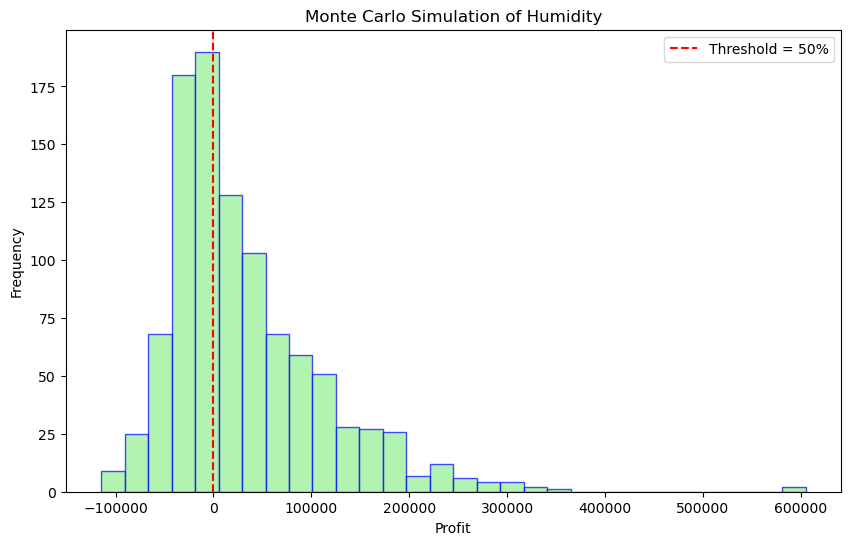

In [10]:
simulated_Profit = np.random.choice(Profitrate, size=num_samples, replace=True)
probability_Profit = np.sum(simulated_Profit > threshold) / num_samples
print(f"Probability of Sales > {threshold}%: {probability_Profit:.2f}")
# Plot the Monte Carlo simulation results
plt.figure(figsize=(10, 6))
plt.hist(simulated_Profit, bins=30, color="lightgreen", edgecolor="blue", alpha=0.7)
plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold}%")
plt.title("Monte Carlo Simulation of Humidity")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [11]:
def bootstrap_resampling(data, num_resamples):
    sample_means = []
    for _ in range(num_resamples):
        resample = np.random.choice(data, size=len(data), replace=True)
        sample_means.append(np.mean(resample))
        return np.array(sample_means)

In [13]:
num_resamples = 1000
Sales_rate = df['SalePrice']
bootstrap_means = bootstrap_resampling(Sales_rate, num_resamples)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

In [14]:
print(f"Original Data Mean Sales: {np.mean(Sales_rate):.2f} ppm")
print(f"Bootstrap Mean Estimate: {np.mean(bootstrap_means):.2f} ppm")
print(f"95% Confidence Interval for Sales Rate: [{lower_bound:.2f}, {upper_bound:.2f}]")

Original Data Mean Sales: 180921.20 ppm
Bootstrap Mean Estimate: 176974.44 ppm
95% Confidence Interval for Sales Rate: [176974.44, 176974.44]


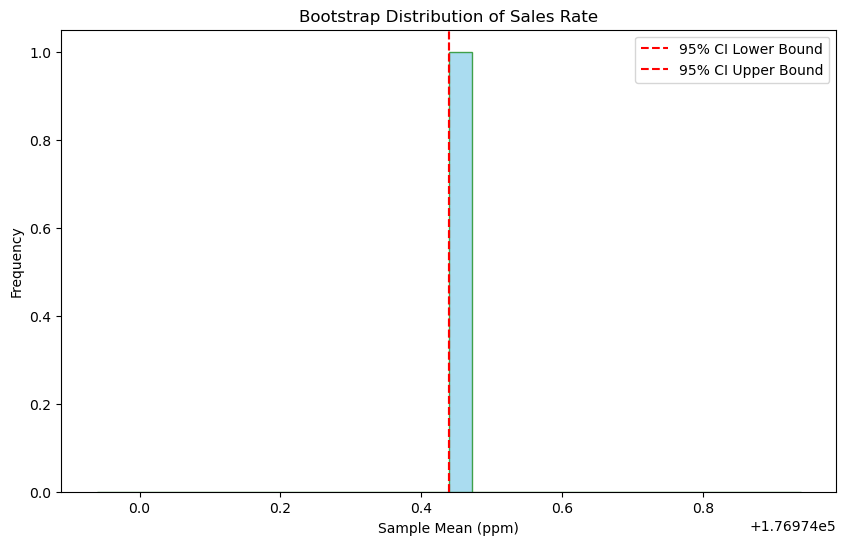

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color="skyblue", edgecolor="green", alpha=0.7)
plt.title("Bootstrap Distribution of Sales Rate")
plt.xlabel("Sample Mean (ppm)")
plt.ylabel("Frequency")
plt.axvline(lower_bound, color="red", linestyle="--", label="95% CI Lower Bound")
plt.axvline(upper_bound, color="red", linestyle="--", label="95% CI Upper Bound")
plt.legend()
plt.show()